# Speed of OT computation as a function of data size

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ot
from skimage.transform import downscale_local_mean

from otimage import io
from otimage.utils import pixel_dist_3d

In [3]:
data_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'

with io.ZimmerReader(data_path) as reader:
    frame_1 = reader.get_frame(25)
    frame_2 = reader.get_frame(26)

frame shape: (890, 650, 33)
num. pixels: 19090500


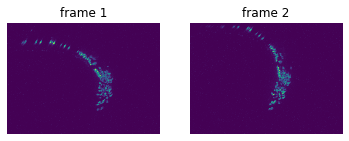

In [4]:
frame_shape = frame_1.shape
n_pixels = frame_shape[0] * frame_shape[1] * frame_shape[2]
print(f'frame shape: {frame_shape}')
print(f'num. pixels: {n_pixels}')

plt.subplot(121)
plt.imshow(np.max(frame_1, 2).T);
plt.title('frame 1')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(frame_2, 2).T);
plt.title('frame 2')
plt.axis('off');

In [5]:
scl = (11, 11, 11)
ds_1 = downscale_local_mean(frame_1, scl)
ds_2 = downscale_local_mean(frame_2, scl)

/home/mn2822/anaconda3/envs/worm-ot/lib/python3.7/site-packages/skimage/util/shape.py:93: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


frame shape (downsampled): (81, 60, 3)
num. pixels (downsampled): 14580


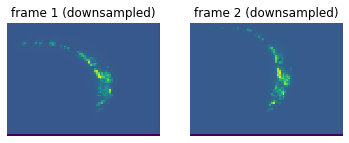

In [6]:
ds_shape = ds_1.shape
n_pixels_ds = ds_shape[0] * ds_shape[1] * ds_shape[2]
print(f'frame shape (downsampled): {ds_shape}')
print(f'num. pixels (downsampled): {n_pixels_ds}')

plt.subplot(121)
plt.imshow(np.max(ds_1, 2).T);
plt.title('frame 1 (downsampled)')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(ds_2, 2).T);
plt.title('frame 2 (downsampled)')
plt.axis('off');

In [7]:
# Normalized pixel distance matrix 
M_nn = pixel_dist_3d(*ds_shape)
M = M_nn / np.median(M_nn)

# Entropic regularization parameter
reg = 1e-3

# Vectorized images
vec_1 = ds_1.flatten()
vec_2 = ds_2.flatten()

In [8]:
%%time
p_mtx = ot.sinkhorn(vec_1, vec_2, M, reg, verbose=False)

CPU times: user 10min 24s, sys: 6.33 s, total: 10min 31s
Wall time: 1min 7s
